In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

In [3]:
datapath = os.path.join("datasets", "credit card fraud detection", "")

In [4]:
credit_card = pd.read_csv(datapath + "creditcard.csv")

In [5]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time : contains the sconds elapsed between each transaction and the first trainsaction
- Amount : represents the transaction amount
- Class : represents the fraud, 1-fraud


In [6]:
credit_card.shape

(284807, 31)

In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
credit_card["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

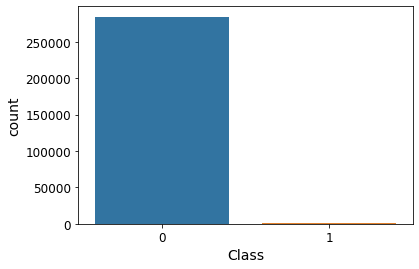

In [10]:
sns.countplot(x=credit_card["Class"])

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

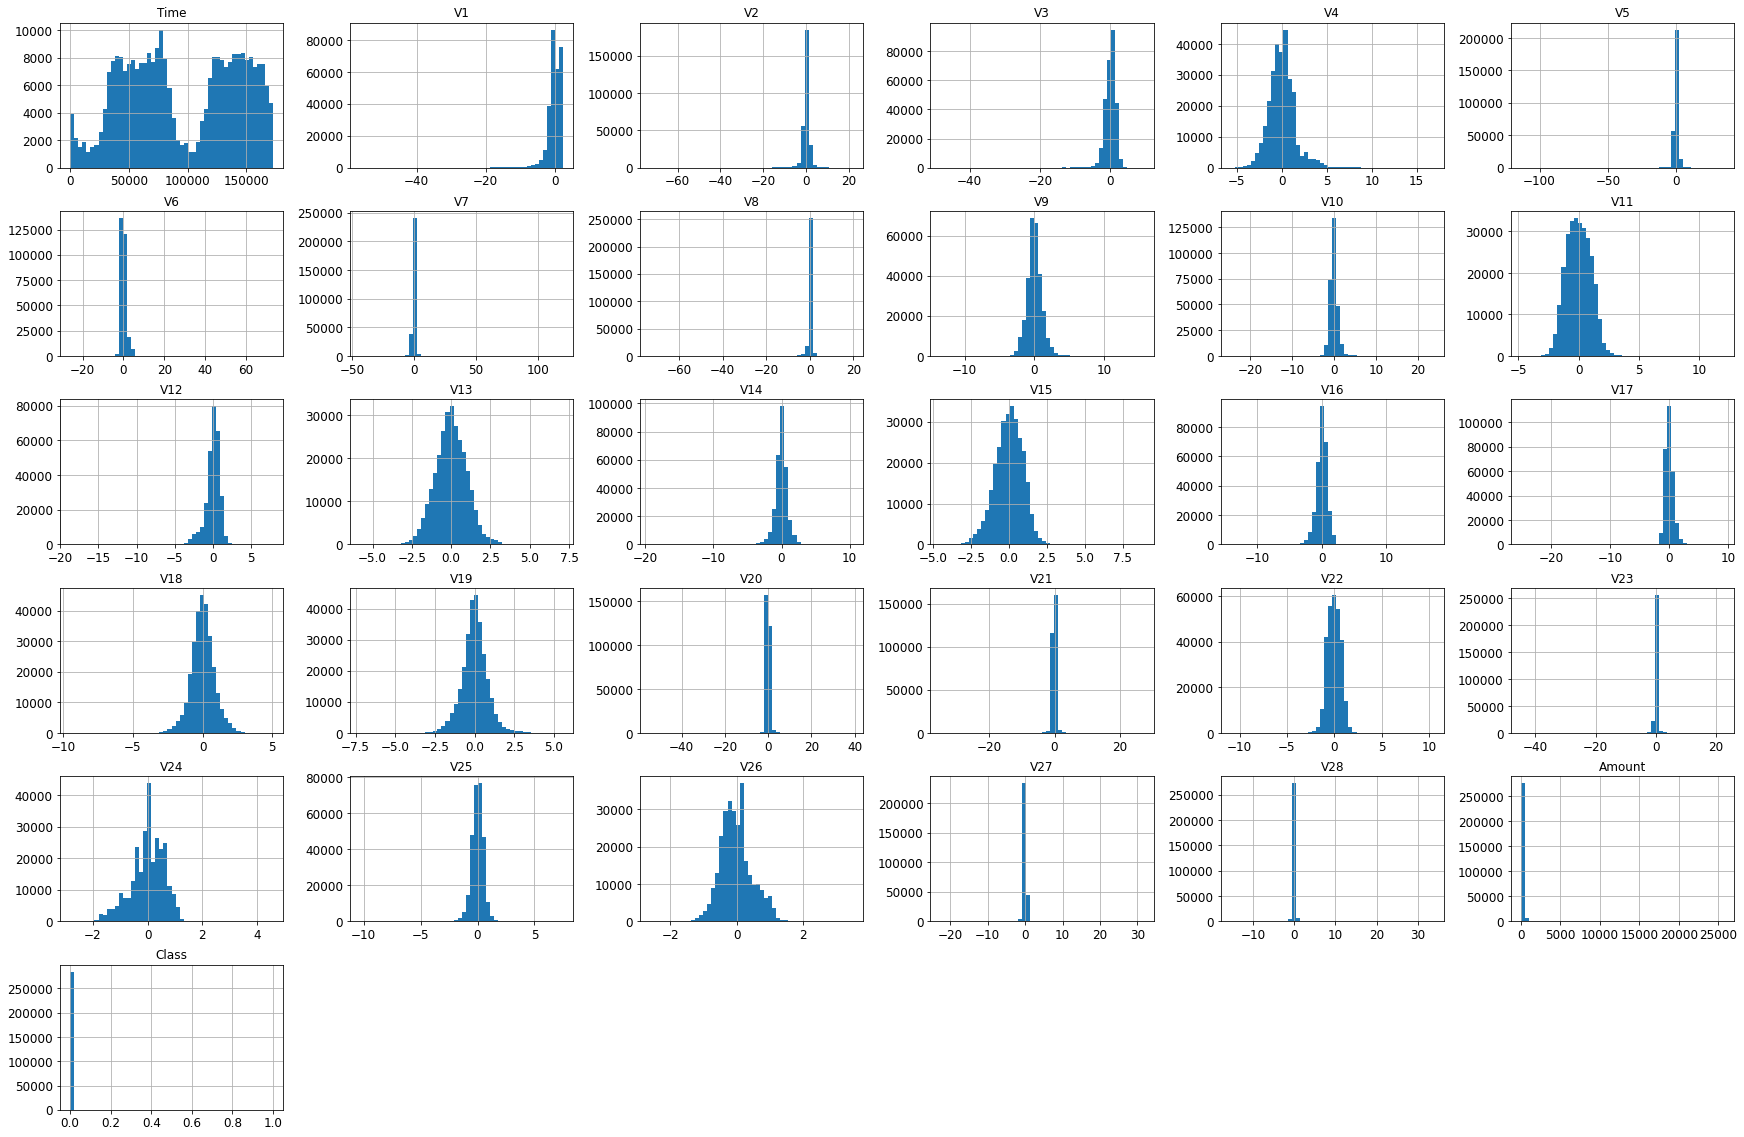

In [11]:
credit_card.hist(bins=50, figsize=(30,20))

In [15]:
X = credit_card.drop('Class', axis = 1)
y = credit_card['Class']

In [16]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=10)

In [21]:
X_train.shape

(227845, 30)

In [22]:
X_test.shape

(56962, 30)

In [23]:
LogisticRegression?

Object `LogisticRegression` not found.


In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_predict = lr_model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[56859,     9],
       [   31,    63]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict) * 100

In [28]:
accuracy

99.92977774656788

In [29]:
from sklearn.linear_model import SGDClassifier
Sgdc = SGDClassifier()
Sgdc.fit(X_train, y_train)

SGDClassifier()

In [30]:
y_predict = Sgdc.predict(X_test)

In [31]:
confusion_matrix(y_test, y_predict)

array([[56860,     8],
       [   34,    60]], dtype=int64)

In [32]:
accuracy = accuracy_score(y_test, y_predict)

In [33]:
accuracy

0.9992626663389628

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(max_depth=4)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
y_predict = DTClassifier.predict(X_test)

In [38]:
from sklearn.tree import plot_tree

[Text(167.4, 195.696, 'X[17] <= -3.183\ngini = 0.003\nsamples = 227845\nvalue = [227447, 398]'),
 Text(98.91818181818182, 152.208, 'X[12] <= -2.183\ngini = 0.377\nsamples = 369\nvalue = [93, 276]'),
 Text(60.872727272727275, 108.72, 'X[14] <= -3.319\ngini = 0.31\nsamples = 339\nvalue = [65, 274]'),
 Text(30.436363636363637, 65.232, 'X[26] <= -0.407\ngini = 0.239\nsamples = 302\nvalue = [42, 260]'),
 Text(15.218181818181819, 21.744, 'gini = 0.428\nsamples = 113\nvalue = [35, 78]'),
 Text(45.654545454545456, 21.744, 'gini = 0.071\nsamples = 189\nvalue = [7, 182]'),
 Text(91.30909090909091, 65.232, 'X[8] <= -0.324\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(76.0909090909091, 21.744, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(106.52727272727273, 21.744, 'gini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(136.96363636363637, 108.72, 'X[21] <= 1.494\ngini = 0.124\nsamples = 30\nvalue = [28, 2]'),
 Text(121.74545454545455, 65.232, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'

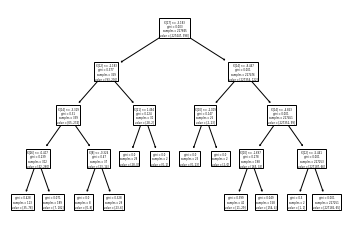

In [39]:
plot_tree(DTClassifier)

In [40]:
confusion_matrix(y_test, y_predict)

array([[56855,    13],
       [   18,    76]], dtype=int64)

In [41]:
accuracy = accuracy_score(y_test, y_predict) * 100

In [42]:
accuracy

99.94557775359011

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random = RandomForestClassifier(n_estimators=2, random_state=10)
random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=10)

In [45]:
y_predict = random.predict(X_test)

In [46]:
confusion_matrix(y_test, y_predict)

array([[56866,     2],
       [   31,    63]], dtype=int64)

In [47]:
accuracy = accuracy_score(y_test, y_predict) * 100

In [48]:
accuracy

99.9420666409185

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
parameters = [{ 'criterion' : ['gini', 'entropy'], 'max_depth':range(1, 10), 'min_samples_split':range(1, 5), 'min_samples_leaf':range(1,5)}]
gridsearch = GridSearchCV(estimator = DTClassifier,
                          param_grid = parameters,
                         scoring = 'accuracy',
                         cv=10,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

C:\Users\kavya\miniconda3\envs\py38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.99903882 0.99903882 0.99903882        nan 0.99903882
 0.99903882 0.99903882        nan 0.99903882 0.99903882 0.99903882
        nan 0.99903882 0.99903882 0.99903882        nan 0.99922316
 0.99922316 0.99922316        nan 0.99922316 0.99922316 0.99922316
        nan 0.99922316 0.99922316 0.99922316        nan 0.99922316
 0.99922316 0.99922316        nan 0.99925388 0.99926704 0.99926704
        nan 0.99925388 0.99925388 0.9992451         nan 0.9992451
 0.9992451  0.99922754        nan 0.99923193 0.9992451  0.9992451
        nan 0.99935044 0.99935482 0.99935921        nan 0.99935921
 0.99935482 0.99935044        nan 0.99934166 0.99933288 0.99934166
        nan 0.99935921 0.99934166 0.99934166        nan 0.99939871
 0.99937238 0.99939871        nan 0.99942066 0.99942505 0.99942066
        nan 0.9994031  0.99936799 0.99938555

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_leaf': range(1, 5),
                          'min_samples_split': range(1, 5)}],
             scoring='accuracy')

In [54]:
gridsearch.best_score_

0.9994645488450906

In [55]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3}